# Introduction

In this notebook, we will learn about evaluation metrics and different techniques to optimise Machine Learning models.

## Table of Content

- [0. Packages](#0)
- [1. Evaluation Metrics](#1)
    - [1.1 Regression Metrics](#1-1)
        - [Mean Absolute Error (MAE)](#1-1-1)
        - [Mean Squared Error (MSE)](#1-1-2)
        - [Root Mean Squared Error (RMSE)](#1-1-3)
    - [1.2 Classification Metrics](#1-2)
        - [True Positives, True Negatives, False Positives, False Negatives](#1-2-1)
        - [Accuracy, Recall & Precision](#1-2-2)
        - [Confusion Matrix](#1-2-3)
        - [AUC and ROC curves](#1-2-4)
- [2. Cross-validation](#2)

# 0. Packages <a name="0"></a>

In this session, we will make use of the following packages:
- [NumPy](https://docs.scipy.org/doc/numpy/) is a popular library for scientific computing.
- [matplotlib](https://matplotlib.org/3.1.1/contents.html) is a plotting library compatible with numpy.
- [pandas](https://pandas.pydata.org/docs/) is what we'll use to manipulate our data.
- [sklearn](https://scikit-learn.org/stable/index.html) will be used to measure the performance of our model.

Run the next cell to import the necessary packages mentioned before. We will add more packages as needed while progressing in this session.

In [85]:
# Good practice to use short but clear aliases for the imported libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
# Magic Function
%matplotlib inline
# Hide all warnings
import warnings
warnings.filterwarnings('ignore') # warnings.filterwarnings(action='once')

# 1. Evaluation Metrics <a name="1"></a>

In Machine Learning (ML), evaluating the trained models is one of the most important tasks in the model creation cycle. 

A typical workflow for supervised learning looks like this:

- 1. Select a model with an initial configuration, train the model and then predict on unseen data (Test Dataset a.k.a `X_test` and `y_test`).
- 2. Compare the target `y_test` with the results from `y_predicted`. Then measure the performance using an evaluation metrics.
- 3. The hyperparameters of the models are finetuned to reach the optimal for the evaluation metric.


Important to know:

- Evaluating a model is an important step to build effective ML models.
- There are many different evaluation metrics with some pros and cons. Some popular metrics are `Accuracy`, `Confusion Matrix`, `AUC and ROC Curves`, and `Mean Squared Error`. 
- Depending on the ML task, there are different metrics for different ML tasks. For example, `Mean Squared Error` is usually used for regression problems, whereas the `Confusion Matrix` for classification. 


In supervised learning, we can perform `classification` and `regression` tasks. In a nutshell, the tasks of `classification` correspond to the task of assigning classes or labels to the sampled data. For example, the problem of classifying images of handwritten digits from 0 to 9 will have 10 classes. On the other hand, regression tries to predict continuous values. For example, predicting the price of a house given the neighbourhood, number of rooms, etc. (Example: [Kaggle Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques))

In this section, we will focus on `classification` and `regression` metrics.


<a name='1-1'></a>
## 1.1 Regression Metrics

To evaluate the performance on regression problems, we will use metrics that measure the distance between the target values and the predictions made by our model. It is common to hear that a regression metric is called `loss` or `error` functions. Depending on the context, some loss functions are referred to with different names. For example, Mean Absolute Error is often called `L1 loss` or `Manhattan distance` in academic papers.

In a regression problem, the objective is to minimize the error, cost or loss function.

For the regression examples, suppose that we already trained a model and we got `y` and the predictions for `y_pred`:

In [86]:
# Set a seed for random numbers
np.random.seed(2020)
# Generate random numbers 
y = np.random.uniform(low=0.0, high=100.0, size=(10,))
y

array([98.62768289, 87.33919458, 50.9745525 , 27.18357143, 33.69187277,
       21.6954265 , 27.64771432, 34.33155928, 86.21589355, 15.669967  ])

In [87]:
# Predictions
y_pred = np.array([90,85,45,34,33,22,28,33,89,16])
y_pred

array([90, 85, 45, 34, 33, 22, 28, 33, 89, 16])

<a name='1-1-1'></a>
## Mean Absolute Error (L1 loss)

According to [wikipedia](https://en.wikipedia.org/wiki/Mean_absolute_error):

> In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement. MAE is calculated as:


$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|$

Let's break the equation:

- $\frac{1}{n_{\text{samples}}}$: Divide everything by the total number of data points.
- $y$: Target output values
- $\hat{y}$: Predicted output values
- $\sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|$: Sum of the absolute value of the difference between $y$ and $\hat{y}$

In [46]:
# Let's implement MAE using numpy
def MAE(y, y_pred):   
    n_samples = len(y)
    mean_abs_err = np.sum(np.abs(y-y_pred))/n_samples
    return mean_abs_err

print(MAE(y,y_pred))

2.9552289225711506


In [47]:
# Scikit-learn has an implementation for MAE

# Let's import it first
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y,y_pred)

2.9552289225711506

<a name='1-1-2'></a>
## Mean Squared Error (L2 loss, also called Euclidean Distance)

Mean Squared Error is probably one of the most popular and used metrics for regression tasks. As it squares the differences, it penalizes more large errors. Being a differentiable function, it can be optimised better.

$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2$


In [48]:
# Let's implement MSE using numpy
def MSE(y, y_pred):   
    n_samples = len(y)
    mean_sq_err = np.sum((y-y_pred)**2)/n_samples
    return mean_sq_err

print(MSE(y,y_pred))

17.239649808666712


In [49]:
# Scikit-learn has an implementation for MSE as well
# Let's import it first
from sklearn.metrics import mean_squared_error

mean_squared_error(y,y_pred)

17.239649808666712

<a name='1-1-3'></a>
## Root Mean Squared Error (RMSE)

$\text{RMSE}(y, \hat{y}) = \sqrt{\frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2}$


In [50]:
# Let's implement MAE using numpy
def RMSE(y, y_pred):   
    n_samples = len(y)
    mean_abs_err = np.sqrt(np.sum((y-y_pred)**2)/n_samples)
    return mean_abs_err

print(RMSE(y,y_pred))

4.152065727883738


In [51]:
# Scikit-learn has an implementation for MSE as well
# Let's import it first MSE
from sklearn.metrics import mean_squared_error

# We could do something like this for this implementation
np.sqrt(mean_squared_error(y,y_pred))

4.152065727883738

There are many implementations of regression metrics in Scikit-learn. Each metric has its advantages and drawbacks.

For a completed list of metrics check the official API:
https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

<a name='1-2'></a>
## 1.2 Classification Metrics
<a name='1-2-1'></a>
### True Positives, False Positives, True Negatives, and False Negatives

The most basic statistics to compute from the model predictions are the true positives, true negatives, false positives and false negatives:

- true positive (TP): The model classifies the example as positive, and the actual label also positive.
- false positive (FP): The model classifies the example as positive, **but** the actual label is negative.
- true negative (TN): The model classifies the example as negative, and the actual label is also negative.
- false negative (FN): The model classifies the example as negative, **but** the label is actually positive.

We will count the number of TP, FP, TN and FN in the given data.  All of our metrics can be built off of these four statistics. 

Recall that the model outputs real numbers between 0 and 1.
* To compute binary class predictions, we need to convert these to either 0 or 1. 
* We'll do this using a threshold value $th$.
* Any model outputs above $th$ are set to 1, and below $th$ are set to 0. 

All of the metrics studies in this section (except for ROC-AUC Curves) will depend on the choice of this threshold. 
<a name='ex-1'></a>
### Exercise 1

The first two metrics, `TP` and `FP` are implemented below. Based on that code, create two more functions for `TN` and `TP`.

In [52]:
# Let's set the threshold as 0.5 by default
def true_positives(y, pred, th=0.5):
    TP = 0
    # get thresholded predictions
    th_preds = (pred > th).astype(int) # astype(int) converts an array of booleans to integers
    # compute True Positives. Use numpy to calculate TP  
    TP = np.sum((y == 1) & (th_preds == 1))
    return TP

def true_negatives(y, pred, th=0.5):
    TN = 0
    # get thresholded predictions
    th_preds = (pred > th).astype(int) # astype(int) converts an array of booleans to integers
    # compute True Negatives. Use numpy to calculate TN
    TN = np.sum((y == 0) & (th_preds == 0))
    return TN

def false_positives(y, pred, th=0.5):
    FP = 0
    # get thresholded predictions
    th_preds = pred > th
    # COMPLETE CODE HERE
    return FP

def false_negatives(y, pred, th=0.5):
    FN = 0
    # get thresholded predictions
    th_preds = pred > th
    # COMPLETE CODE HERE
    return FN

You can click in the button below the reveal the solution for exercise 1

<details>    
<summary>
    <font size="4" color="darkblue"><b>See the solution for Exercise 1</b></font>
</summary>
    
```python
    def false_positives(y, pred, th=0.5):
        FP = 0
        # get thresholded predictions
        th_preds = (pred > th).astype(int)
        # compute FP
        FP = np.sum(((y == 0) & (th_preds == 1)).astype(int))
        return FP

    def false_negatives(y, pred, th=0.5):
        FN = 0
        # get thresholded predictions
        th_preds = (pred > th).astype(int)
        FN = np.sum(((y == 1) & (th_preds == 0)).astype(int))
        return FN
 ```
</details>


<a name='1-2-2'></a>
## Accuracy, Precision, Recall

From the basic statistics we can calculate metrics such as accuracy, precision and recall.

A few definitions from Wikipedia below:

- **Accuracy**: Accuracy is the closeness of the measurements to a specific value (Source: [Wikipedia](https://en.wikipedia.org/wiki/Accuracy_and_precision)). 

$\displaystyle \mathrm {ACC} ={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {TP} +\mathrm {TN} +\mathrm {FP} +\mathrm {FN} }}$

Accuracy is one of the most popular metrics for classification. However, accuracy alone might not be the best metric to benchmark the performance of a ML model.


In the following scenario, imagine that you trained an ML binary classification model and you got $y$ and $\hat{y}$ like this. You also want calculate a threshold of 0,5:

**Model 1:**

<table>
<tr><th>Original </th><th>With Threshold 0,5</th></tr>
<tr><td>
    
| $y$ | $\hat{y}$ |
| :-: | :-: | 
| 0 | 0,2 |
| 1 | 0,6 |
| 0 | 0,44 |
| 1 | 0,8 |
| 1 | 0,75 |
| 0 | 0,55 |
| 0 | 0,25 |
| 1 | 0,67 |
| 1 | 0,32 |
| 1 | 0,15 |
    
</td><td>
    
| $y$ | $\hat{y}$ |
| :-: | :-: | 
| 0 | 0 |
| 1 | 1 |
| 0 | 0 |
| 1 | 1 |
| 1 | 1 |
| 0 | 1 |
| 0 | 0 |
| 1 | 1 |
| 1 | 0 |
| 1 | 0 |

</td></tr></table>

From those results, let's calculate TP, TN, FP, FN:

<details>    
<summary>
    <font size="4" color="darkgreen"><b>Help...</b></font>
</summary>
    
```python
    TP = np.sum(((y == 1) & (th_preds == 1)).astype(int))
    TN = np.sum(((y == 0) & (th_preds == 0)).astype(int))
    FP = np.sum(((y == 0) & (th_preds == 1)).astype(int))
    FN = np.sum(((y == 1) & (th_preds == 0)).astype(int))
 ```
</details>

- $\mathrm{TP = 4}$
- $\mathrm{TN = 3}$
- $\mathrm{FP = 1}$
- $\mathrm{FN = 2}$

To calculate accuracy:

$\displaystyle \mathrm {ACC} ={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {TP} +\mathrm {TN} +\mathrm {FP} +\mathrm {FN} }}$


So in our case:

$\displaystyle \mathrm {ACC} ={\frac {\mathrm {4} +\mathrm {3} }{\mathrm {4} +\mathrm {3} +\mathrm {1} +\mathrm {2} }} = {\frac{7}{10}} = 0,7 $

So we got an accuracy of 0,7. No bad right? Now let's compare with the next example:

<a name='ex-2'></a>
### Exercise 2

Imagine that you have trained another ML algorithm and you get the results below:
1. Calculate results with a threshold of 0,5
2. Calculate TP, TN, FP, FN
3. Calculate accuracy

**Model 2:**


<table>
<tr><th>Original </th><th>With Threshold 0,5</th></tr>
<tr><td>
    
| $y$ | $\hat{y}$ |
| :-: | :-: |
| 0 | 0,01 |
| 0 | 0,01 |
| 1 | 0,01 |
| 1 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
    
</td><td>
    
| $y$ | $\hat{y}$ |
| :-: | :-: |
| 0 | 0 |
| 0 | 0 |
| 1 | 0 |
| 1 | 0 |
| 0 | 0 |
| 0 | 0 |
| 0 | 0 |
| 0 | 0 |
| 0 | 0 |
| 0 | 0 |

</td></tr></table>

You can click in the button below the reveal the solution for exercise 2

<details>    
<summary>
    <font size="4" color="darkblue"><b>See the solution for Exercise 2</b></font>
</summary>


<table>
<tr><th>Original </th><th>With Threshold 0,5</th><th>Results</th></tr>
<tr><td>
    
| $y$ | $\hat{y}$ |
| :-: | :-: |
| 0 | 0,01 |
| 0 | 0,01 |
| 1 | 0,01 |
| 1 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
    
</td><td>
    
| $y$ | $\hat{y}$ |
| :-: | :-: | 
| 0 | 0 |
| 0 | 0 |
| 1 | 0 |
| 1 | 0 |
| 0 | 0 |
| 0 | 0 |
| 0 | 0 |
| 0 | 0 |
| 0 | 0 |
| 0 | 0 |

</td><td>
    
- $TP=0$
- $TN=8$
- $FP=0$
- $FN=2$    
    
    
$\displaystyle \mathrm {ACC} ={\frac {\mathrm {0} +\mathrm {8} }{\mathrm {0} +\mathrm {8} +\mathrm {0} +\mathrm {2} }} = {\frac{8}{10}} = 0,8 $
    
</td></tr> </table>
    
**IMPORTANT (READ THIS):** <br/>
So our accuracy is 80% now ! Does this mean that our second model is better?
    
Actually, our first intuition would tell us that the first model is better, even if we are getting a better accuracy from the second model. Why is that?
    
If we check the results for the second model, we will notice that the second model always predicts 0.01. This is not a very useful model and that's why we should not rely only in the accuracy metric.
</details>

Let's talk now about recall and precision.

Some few definitions from Wikipedia below:

- **recall**: measures the proportion of actual positives that are correctly identified as such (Source: [Wikipedia](https://en.wikipedia.org/wiki/Sensitivity_and_specificity)). <br/>
$\displaystyle \mathrm {Recall} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN}}}$

- **precision**: are the proportions of positive results that are true positives (Source: [Wikipedia](https://en.wikipedia.org/wiki/Accuracy_and_precision)).  <br/>
$\displaystyle \mathrm {Precision} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FP}}}$


From the last exercise we had:

- $TP=0$
- $TN=8$
- $FP=0$
- $FN=2$    
    
$\displaystyle \mathrm {ACC} ={\frac {\mathrm {0} +\mathrm {8} }{\mathrm {0} +\mathrm {8} +\mathrm {0} +\mathrm {2} }} = {\frac{8}{10}} = 0,8 $

Now, let's calculate the Recall and Precision for the same example:

$\displaystyle \mathrm {Recall} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN}}}={\frac {\mathrm {0}}{\mathrm {0} +\mathrm {2}}}=0$
    
$\displaystyle \mathrm {Precision} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FP}}}={\frac {\mathrm {0} }{\mathrm {0} +\mathrm {0}}}=$Error (Do not divide by zero)

**Note:** We can modify the formula and add a small value $\epsilon$ to avoid problems of division by zero.
Then, the new formula could be:

$\displaystyle \mathrm {Precision} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FP} + \epsilon}}$

where $\epsilon$ is equal to small number such as 0,000001

Then:

$\displaystyle \mathrm {Precision} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FP} + \epsilon}}={\frac {\mathrm {0} }{\mathrm {0} +\mathrm {0} + 0,000001}}=0$


### Exercise 3

We already calculated the `precision` and `recall` for the second model of our example. We noticed that in both cases we got a value of zero. Despite of having an accuracy of 80%, a precision and recall of 0 is very suspicious. This would usually mean that there is something wrong either with our model or the test data set we are using to evaluate.

- Calculate the precision and recall for the first model
- Compare how those accuracy, precision and recall differ between model 1 and model 2 

Model 1:
<table>
<tr><th>Original </th><th>With Threshold 0,5</th></tr>
<tr><td>
    
| $y$ | $\hat{y}$ |
| :-: | :-: | 
| 0 | 0,2 |
| 1 | 0,6 |
| 0 | 0,44 |
| 1 | 0,8 |
| 1 | 0,75 |
| 0 | 0,55 |
| 0 | 0,25 |
| 1 | 0,67 |
| 1 | 0,32 |
| 1 | 0,15 |
    
</td><td>
    
| $y$ | $\hat{y}$ |
| :-: | :-: | 
| 0 | 0 |
| 1 | 1 |
| 0 | 0 |
| 1 | 1 |
| 1 | 1 |
| 0 | 1 |
| 0 | 0 |
| 1 | 1 |
| 1 | 0 |
| 1 | 0 |

</td></tr></table>

Model 2:
<table>
<tr><th>Original </th><th>With Threshold 0,5</th></tr>
<tr><td>
    
| $y$ | $\hat{y}$ |
| :-: | :-: |
| 0 | 0,01 |
| 0 | 0,01 |
| 1 | 0,01 |
| 1 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
    
</td><td>
    
| $y$ | $\hat{y}$ |
| :-: | :-: |
| 0 | 0 |
| 0 | 0 |
| 1 | 0 |
| 1 | 0 |
| 0 | 0 |
| 0 | 0 |
| 0 | 0 |
| 0 | 0 |
| 0 | 0 |
| 0 | 0 |

</td></tr></table>

You can click in the button below the reveal the solution for exercise 1
<details>    
<summary>
    <font size="4" color="darkblue"><b>See the solution for Exercise 3</b></font>
</summary>
    
**Model 1:**
    
- $\mathrm{TP = 4}$
- $\mathrm{TN = 3}$
- $\mathrm{FP = 1}$
- $\mathrm{FN = 2}$

$\displaystyle \mathrm {ACC} ={\frac {\mathrm {4} +\mathrm {3} }{\mathrm {4} +\mathrm {3} +\mathrm {1} +\mathrm {2} }} = {\frac{7}{10}} = 0,7 $
    
$\displaystyle \mathrm {Recall} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN}}}={\frac {\mathrm {4}}{\mathrm {4} +\mathrm {2}}}=\frac {\mathrm {4}}{\mathrm {6}} = 0.67$
    
$\displaystyle \mathrm {Precision} ={\frac {\mathrm {TP}}{\mathrm {TP} +\mathrm {FP}}}={\frac{\mathrm {4}}{\mathrm {4} +\mathrm {1}}}=\frac {\mathrm {4}}{\mathrm {5}} = 0.8$
    
**Model 2:**
    
- $\mathrm{TP = 0}$
- $\mathrm{TN = 8}$
- $\mathrm{FP = 0}$
- $\mathrm{FN = 2}$
    
$\displaystyle \mathrm {ACC} ={\frac {\mathrm {0} +\mathrm {8} }{\mathrm {0} +\mathrm {8} +\mathrm {0} +\mathrm {2} }} = {\frac{8}{10}} = 0,8 $
    
$\displaystyle \mathrm {Recall} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} +\epsilon}}={\frac {\mathrm {0}}{\mathrm {0} +\mathrm {2}+\epsilon}}=\frac {\mathrm {0}}{\mathrm {2}+\epsilon} = 0$
    
$\displaystyle \mathrm {Precision} ={\frac {\mathrm {TP}}{\mathrm {TP} +\mathrm {FP}+\epsilon}}={\frac{\mathrm {0}}{\mathrm {0} +\mathrm {1}+\epsilon}}=\frac {\mathrm {0}}{\mathrm {0}+\epsilon} = 0$
    
</details>   

### Metrics in Python
Let's implement the metrics for accuracy, recall, and precision in Python.

But first, let's check again the functions to calculate TP,TN,FP and FN

In [53]:
# If you implemented correctly the functions in exercise 1. It should look like this code below:
# Let's set the threshold as 0.5 by default
def true_positives(y, pred, th=0.5):
    TP = 0
    # get thresholded predictions
    th_preds = (pred > th).astype(int) # astype(int) will convert an array of booleans to integers
    # compute True Positives. Use numpy to calculate TP  
    TP = np.sum(((y == 1) & (th_preds == 1)).astype(int))
    return TP

def true_negatives(y, pred, th=0.5):
    TN = 0
    # get thresholded predictions
    th_preds = (pred > th).astype(int)
    # compute True Negatives. Use numpy to calculate TN
    TN = np.sum(((y == 0) & (th_preds == 0)).astype(int))
    return TN

def false_positives(y, pred, th=0.5):
    FP = 0
    # get thresholded predictions
    th_preds = (pred > th).astype(int)
    # compute FP
    FP = np.sum(((y == 0) & (th_preds == 1)).astype(int))
    return FP

def false_negatives(y, pred, th=0.5):
    FN = 0
    # get thresholded predictions
    th_preds = (pred > th).astype(int)
    FN = np.sum(((y == 1) & (th_preds == 0)).astype(int))
    return FN

Remember that the accuracy is defined by:

$\displaystyle \mathrm {ACC} ={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {TP} +\mathrm {TN} +\mathrm {FP} +\mathrm {FN} }}$

In [54]:
# Implementation of Accuracy in Python
def accuracy(y,y_hat):
    TP = true_positives(y,y_hat)
    TN = true_negatives(y,y_hat)
    FP = false_positives(y,y_hat)
    FN = false_negatives(y,y_hat)
    
    return (TP+TN)/(TP+TN+FP+FN)

In [55]:
# Data from Model 1
y = np.array([0,1,0,1,1,0,0,1,1,1])
y_hat = np.array([.2,.6,.44,.8,.75,.55,.25,.67,.32,.15])

th = 0.5
y_pred = (y_hat > th).astype(int)

accuracy(y, y_pred)

0.7

# Exercise 4

Implement the metrics for precision and recall in Python

In [56]:
# IMPLEMENT CODE HERE



<details>    
<summary>
    <font size="4" color="darkblue"><b>See the solution for Exercise 4</b></font>
</summary>
    
```python
# Implementation of Recall in Python
def recall(y,y_hat):
    TP = true_positives(y,y_hat)
    FN = false_negatives(y,y_hat)

    return (TP)/(TP+FN)

print(recall(y,y_hat))
# Output: 0.666666666
# Implementation of Precision in Python
def precision(y,y_hat):
    TP = true_positives(y,y_hat)
    FP = false_positives(y,y_hat)

    return (TP)/(TP+FP)

print(precision(y,y_hat))
# Output: 0.8
```
</details>

<a name='1-1-3'></a>
### Confusion Matrix and F1-Score

> In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa). The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabeling one as another).

> ... is a table with two rows and two columns that reports the number of false positives, false negatives, true positives, and true negatives. This allows more detailed analysis than mere proportion of correct classifications (accuracy). Accuracy will yield misleading results if the data set is unbalanced; that is, when the numbers of observations in different classes vary greatly.

**Note:** In this session, we won't cover how to deal with imbalanced data.

A Confusion Matrix is an useful tool for the evaluation of classification models. Scikit-learn has an implementation of this.


Let's check an example of the Confusion Matrix using the data for the **model 1:**


In [57]:
# Import module
from sklearn.metrics import confusion_matrix as cm
c_matrix = cm(y, (y_hat > 0.5).astype(int))
print(c_matrix)

[[3 1]
 [2 4]]


In [58]:
# You can use ravel to extract the statistics TP,TN,FP,FN
tn, fp, fn, tp = cm(y, (y_hat > 0.5).astype(int)).ravel()
print(tn,fp,fn,tp)

3 1 2 4


Did you noticed any relation between tn,fp,fn,tp and the confusion matrix?

<table class="wikitable" style="border:none; float:left; margin-top:0;">
<tbody><tr>
<th style="background:white; border:none;" colspan="2" rowspan="2">
</th>
<th colspan="2" style="background:none;">Predicted class
</th></tr>
<tr>
<th>Negative
</th>
<th>Positive
</th></tr>
<tr>
<th rowspan="2" style="height:6em;"><div style="display: inline-block; -ms-transform: rotate(-90deg); -webkit-transform: rotate(-90deg); transform: rotate(-90deg);;">Actual<br>class</div>
</th>
<th>Negative
</th>
<td><b>TN</b>
</td>
<td>FP
</td></tr>
<tr>
<th>Positive
</th>
<td>FN
</td>
<td><b>TP</b>
</td></tr>
</tbody></table>


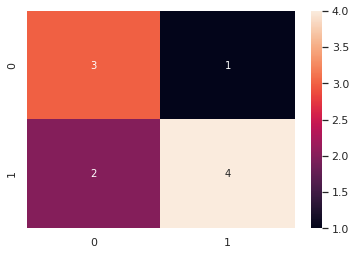

In [59]:
# Now let's plot a confusion matrix
import seaborn as sns

# Calculate confusion matrix
c_matrix = cm(y, (y_hat > 0.5).astype(int))
f = sns.heatmap(c_matrix, annot=True)

## $F_{1}$ Score ( Harmonic Mean )

From [Wikipedia](https://en.wikipedia.org/wiki/F1_score):
> In statistical analysis of binary classification, the F1 score (also F-score or F-measure) is a measure of a test's accuracy. It considers both the precision p and the recall r of the test to compute the score: p is the number of correct positive results divided by the number of all positive results returned by the classifier, and r is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive).
The F1 score is the harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall). The F1 score is also known as the Sørensen–Dice coefficient or Dice similarity coefficient (DSC).

F1 Score is a good way of taking into consideration precision and recall in one single metric.

According to the official [Scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html):

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

```python
F1 = 2 * (precision * recall) / (precision + recall)
```

In the multi-class and multi-label case, this is the average of the F1 score of each class with weighting depending on the average parameter.

In [60]:
# First import the metric f1_score
from sklearn.metrics import f1_score

print(f1_score(y, y_pred, average='macro'))
print(f1_score(y, y_pred, average='micro'))
print(f1_score(y, y_pred, average='weighted'))

0.6969696969696968
0.7
0.7030303030303029


Find information about the precision - recall metrics [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py)

In [61]:
# Other metrics
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.73


<a name='1-2-4'></a>
## AUC and ROC Curve
### AUC (Area Under the Curve)

Another way to measure this relationship between precision and recall is by plotting the curve and calculating the area.

#### Example of Precision-Recall on Iris dataset

The example below is taken from [here](https://jaquesgrobler.github.io/online-sklearn-build/auto_examples/plot_precision_recall.html).

The code below will plot the precision-recall curve and will measure the Area Under the Curve (AUC) for the dataset iris. The precisio-recall method is used for binary classifier. However, we could use `label_binarize`.

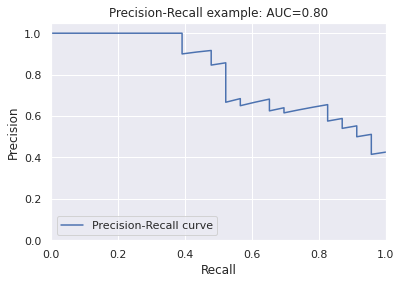

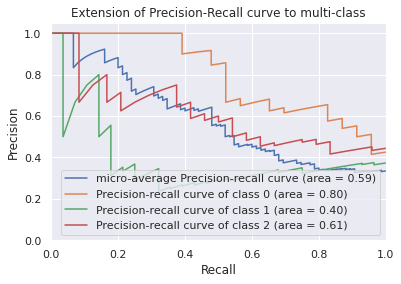

In [62]:
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features (Just for illustration purposes)
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=random_state)

# Run classifier
# OneVsRestClassifier is needed given that SVM is a binary classifier originally
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# Compute micro-average ROC curve and ROC area
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")

# Plot Precision-Recall curve
plt.clf()
plt.plot(recall[0], precision[0], label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision[0]))
plt.legend(loc="lower left")
plt.show()

# Plot Precision-Recall curve for each class
plt.clf()
plt.plot(recall["micro"], precision["micro"],
        label='micro-average Precision-recall curve (area = {0:0.2f})'
              ''.format(average_precision["micro"]))
for i in range(n_classes):
    plt.plot(recall[i], precision[i],
            label='Precision-recall curve of class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(loc="lower right")
plt.show()

### ROC (Receiver operating characteristic) Curve

From [Wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#:~:text=A%20receiver%20operating%20characteristic%20curve,its%20discrimination%20threshold%20is%20varied.):

> The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection in machine learning. The false-positive rate is also known as probability of false alarm and can be calculated as (1 − specificity).

Example from : https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

In [63]:
# Import roc_curve and auc
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

ROC Curve allow us to quickly visualise how well a model performs w.r.t FPR and TPR

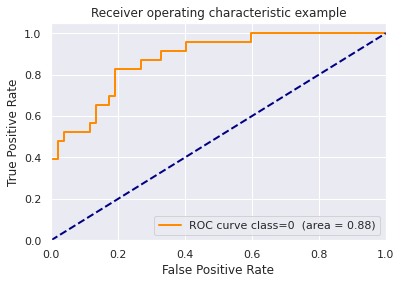

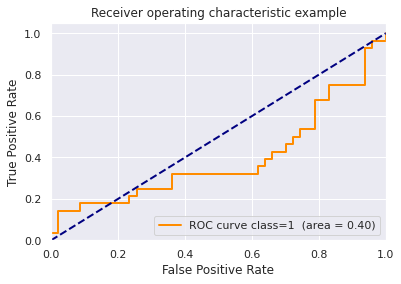

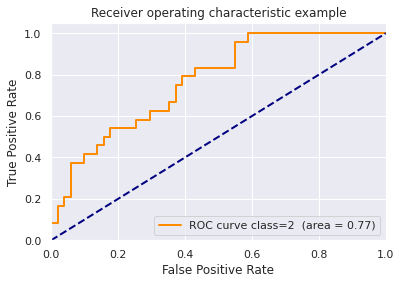

In [64]:
# Plot for every iris class (3 in total)
for cls in range(0,3):
    # Plot of a ROC curve for a specific class
    plt.figure()
    lw = 2
    plt.plot(fpr[cls], tpr[cls], color='darkorange',
             lw=lw, label=f'ROC curve class={cls}  (area = %0.2f)' % roc_auc[cls])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

<a name='2'></a>
# Cross-validation

Source: [Wikipedia](https://en.wikipedia.org/wiki/Cross-validation_(statistics))

> Cross-validation, sometimes called rotation estimation or out-of-sample testing, is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. In a prediction problem, a model is usually given a dataset of known data on which training is run (training dataset), and a dataset of unknown data (or first seen data) against which the model is tested (called the validation dataset or testing set). The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

> One round of cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset (called the training set), and validating the analysis on the other subset (called the validation set or testing set). To reduce variability, in most methods multiple rounds of cross-validation are performed using different partitions, and the validation results are combined (e.g. averaged) over the rounds to give an estimate of the model's predictive performance.
In summary, cross-validation combines (averages) measures of fitness in prediction to derive a more accurate estimate of model prediction performance

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/K-fold_cross_validation_EN.svg/2880px-K-fold_cross_validation_EN.svg.png' width=500 heigh=500>

Source Image: [Wikipedia](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#/media/File:K-fold_cross_validation_EN.svg)
License: [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0)


In this session, we will learn about the cross-validation, also called 'k-fold cross-validation' method.


We already used `train_test_split` to split the data, so we can measure the quality of a model on the test data. Cross-validation extends this approach. Compared to `train_test_split`, cross-validation gives you a more reliable measure of a model's quality, however, it takes longer to run.

The example below is based on this amazing notebook in Kaggle:

Source: [Cross-validation](https://www.kaggle.com/dansbecker/cross-validation)
License: [Apache License 2.0](http://www.apache.org/licenses/LICENSE-2.0)


> **The Shortcoming of Train-Test Split:** <br/>
Imagine you have a dataset with 5000 rows. The `train_test_split` function has an argument for test_size that you can use to decide how many rows go to the training set and how many go to the test set. The larger the test set, the more reliable your measures of model quality will be. At an extreme, you could imagine having only 1 row of data in the test set. If you compare alternative models, which one makes the best predictions on a single data point will be mostly a matter of luck.
You will typically keep about 20% as a test dataset. But even with 1000 rows in the test set, there's some random chance in determining model scores. A model might do well on one set of 1000 rows, even if it would be inaccurate on a different 1000 rows. The larger the test set, the less randomness (aka "noise") there is in our measure of model quality.
But we can only get a large test set by removing data from our training data, and smaller training datasets mean worse models. In fact, the ideal modelling decisions on a small dataset typically aren't the best modelling decisions on large datasets.

> **Trade-offs Between Cross-Validation and Train-Test Split** <br/>
Cross-validation gives a more accurate measure of model quality, which is especially important if you are making a lot of modeling decisions. However, it can take more time to run, because it estimates models once for each fold. So it is doing more total work.
Given these tradeoffs, when should you use each approach? On small datasets, the extra computational burden of running cross-validation isn't a big deal. These are also the problems where model quality scores would be least reliable with train-test split. So, if your dataset is smaller, you should run cross-validation.
For the same reasons, a simple train-test split is sufficient for larger datasets. It will run faster, and you may have enough data that there's little need to re-use some of it for holdout.
There's no simple threshold for what constitutes a large vs small dataset. If your model takes a couple minute or less to run, it's probably worth switching to cross-validation. If your model takes much longer to run, cross-validation may slow down your workflow more than it's worth.
Alternatively, you can run cross-validation and see if the scores for each experiment seem close. If each experiment gives the same results, train-test split is probably sufficient.


K-fold procedure can be described in the following steps:

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    - Take the group as a hold out or test data set
    - Take the remaining groups as a training data set
    - Fit a model on the training set and evaluate it on the test set
    - Retain the evaluation score and discard the model
4. Summarise the skill of the model using the sample of model evaluation scores

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
titanic = sns.load_dataset("titanic")
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


The titanic dataset is a very popular dataset to teach or coach data science. So in this example, we will use a simplified version of the dataset. The aim of our model will be to predict  who survived given some parameters such as `sex`, `age`, and `class`. Then we will perform a cross-validation to evaluate the model. 


Source: [Kaggle Titanic](https://www.kaggle.com/sherli/complete-guide-for-titanic-survival-prediction),
        [Kaggle Titanic 2](https://www.kaggle.com/volhaleusha/titanic-tutorial-encoding-feature-eng-81-8)
License: [Apache 2.0](http://www.apache.org/licenses/LICENSE-2.0)

In [88]:
# First, let's check the columns
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

We can notice that there are some numerical and categorical values. Also, there are some missing information in some columns such as 'age', 'deck', and 'embark_town'.

In [89]:
# Check the type of data from the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [68]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In real-life, datasets are often imcompleted. It's said that 80% of the work of a Data Scientist consist in understanding and cleaning dataset rather than creating models or evaluating them.

In this session, we will use only some columns from the dataset and will show how to deal with missing data for the 'age' column.

There are two main ways we could deal with the missing data in the column 'age':

1. Calculate the mean age for everyone
```python
mean_age=titanic['age'].mean()
age=int(mean_age)
print(age)
# Output: 29
titanic['age'].fillna(age,inplace=True)
```

If we want our model to be more accurate, we should always use our expertise and apply that domain expertise in our model. For example, it is a well-know fact that the life expectancy by gender is different.

In [69]:
# Second Approach. Age by gender
# If sex is male
gend_male = pd.DataFrame(titanic[titanic["sex"] == "male"])
# Get mean of male age
mean_age_male = gend_male['age'].mean()
print(mean_age_male)

30.72664459161148


In [70]:
gend_female = pd.DataFrame(titanic[titanic["sex"] == "female"])
mean_age_female = gend_female['age'].mean()
print(mean_age_female)

27.915708812260537


In [71]:
# Fill empty values for age
titanic.loc[(titanic['age'].isna()) & (titanic['sex']=='male'), 'age']= mean_age_male
titanic.loc[(titanic['age'].isna()) & (titanic['sex']=='female'), 'age']= mean_age_female

In [72]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.736034,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.014897,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [73]:
df = titanic[['sex','age','pclass','class','survived']]
df.head()

,sex,age,pclass,class,survived
0,male,22.0,3,Third,0
1,female,38.0,1,First,1
2,female,26.0,3,Third,1
3,female,35.0,1,First,1
4,male,35.0,3,Third,0


In [74]:
# Let's split first X and y
X = df.iloc[:,0:-1]
y = df[['survived']]

# Then between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

In [75]:
# Import all metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score

def calculate_metrics(y, y_pred):
    print('Confusion Matrix:\n',confusion_matrix(y, y_pred))
    print('ROC-AUC',roc_auc_score(y, y_pred))
    print('F1',f1_score(y, y_pred))
    print('Accuracy',accuracy_score(y, y_pred))

In [76]:
X_train.columns

Index(['sex', 'age', 'pclass', 'class'], dtype='object')

In [77]:
X_train.head()

,sex,age,pclass,class
131,male,20.0,3,Third
70,male,32.0,2,Second
781,female,17.0,1,First
508,male,28.0,3,Third
116,male,70.5,3,Third


In [78]:
from sklearn.preprocessing import LabelEncoder

# Let's encode the categorical values 'class' and 'sex'
le = LabelEncoder()
columns = ['sex', 'class']
   
for col in columns:
    le.fit(X_train[col])
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [79]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Let's train some models and compare the results

### RandomForest Model

In [80]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
calculate_metrics(y_test, y_pred)

Confusion Matrix:
 [[87 18]
 [30 44]]
ROC-AUC 0.7115830115830116
F1 0.6470588235294118
Accuracy 0.7318435754189944


### KNN Classifier

In [81]:
model_knn = KNeighborsClassifier()
# Let's fit the data
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
calculate_metrics(y_test, y_pred)

Confusion Matrix:
 [[89 16]
 [37 37]]
ROC-AUC 0.6738095238095237
F1 0.5826771653543307
Accuracy 0.7039106145251397


### Decision Tree

In [82]:
model_dt = DecisionTreeClassifier()
# Let's fit the data
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
calculate_metrics(y_test, y_pred)

Confusion Matrix:
 [[92 13]
 [28 46]]
ROC-AUC 0.7489060489060488
F1 0.6917293233082706
Accuracy 0.770949720670391


### Random Forest

In [83]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
calculate_metrics(y_test, y_pred)

Confusion Matrix:
 [[88 17]
 [24 50]]
ROC-AUC 0.7568854568854568
F1 0.7092198581560283
Accuracy 0.770949720670391


Now let's try to evaluate different models using cross-validation:

Now in the code below, we will apply cross-validation with 10 splits for `Logistic Regression`,`KNN`,`Decision Tree` and `Random Forest`.

In [84]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

kfold = KFold(n_splits=10, random_state=2020) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','KNN','Decision Tree','Random Forest']
models=[LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Logistic Regression,0.801995,0.037264
KNN,0.764085,0.047891
Decision Tree,0.818858,0.040631
Random Forest,0.827269,0.029799


## References and further reading
- [Cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics))

Models:
- [Decision Trees](https://en.wikipedia.org/wiki/Decision_tree)
- [KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
- [Random Forest](https://en.wikipedia.org/wiki/Random_forest)
- [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression)

Examples:
- [Seaborn Datasets](https://seaborn.pydata.org/generated/seaborn.load_dataset.html)
- [Example Titanic](https://www.kaggle.com/sherli/complete-guide-for-titanic-survival-prediction)